In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# add the latitudes and longitudes to a lits
coordinates = list(lat_lngs)

In [4]:
#use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
# create a list for holding cities
cities = []

# identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count
len(cities)

606

In [6]:
# import the requets library
import requests

#import API key
from config import weather_api_key

In [7]:
# starting URL for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [8]:
#import the datetime module from the datetime library
from datetime import datetime

In [9]:
#create an empty list to hold the weather data
city_data = []

#print the beginning of the logging
print("Beginning Data Retrieval            ")
print("------------------------------------")

#create counters
record_count = 1
set_count = 1

#loop through all the cities in our list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count += 1
        
    # create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the URl, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #add 1 to the record count
    record_count += 1
    
    #run an API request for each of the cities
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        #append the city information into the city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    #if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
#indicate that data loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")      
        

Beginning Data Retrieval            
------------------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | bengkulu
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | mayachnyy
Processing Record 6 of Set 1 | tadine
Processing Record 7 of Set 1 | meulaboh
Processing Record 8 of Set 1 | te anau
Processing Record 9 of Set 1 | edmundston
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | tazovskiy
Processing Record 12 of Set 1 | torbay
Processing Record 13 of Set 1 | puerto narino
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | balasinor
City not found. Skipping...
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | gawler
Processing Record 21 of Set 1 | kalemie
Processing 

Processing Record 188 of Set 4 | dingle
Processing Record 189 of Set 4 | sisimiut
Processing Record 190 of Set 4 | cayenne
Processing Record 191 of Set 4 | nome
Processing Record 192 of Set 4 | roald
Processing Record 193 of Set 4 | vila velha
Processing Record 194 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 195 of Set 4 | tuy hoa
Processing Record 196 of Set 4 | rodez
Processing Record 197 of Set 4 | luderitz
Processing Record 198 of Set 4 | boulder
Processing Record 199 of Set 4 | ozgon
City not found. Skipping...
Processing Record 200 of Set 4 | oudtshoorn
Processing Record 201 of Set 4 | puerto ayora
Processing Record 202 of Set 4 | luanda
Processing Record 203 of Set 4 | santa cruz de la palma
Processing Record 205 of Set 5 | santa catarina de tepehuanes
Processing Record 206 of Set 5 | jackson
Processing Record 207 of Set 5 | viksoyri
City not found. Skipping...
Processing Record 208 of Set 5 | alihe
Processing Record 209 of Set 5 | clyde river
Processing

Processing Record 375 of Set 8 | berezovyy
Processing Record 376 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 377 of Set 8 | san quintin
Processing Record 378 of Set 8 | ahumada
City not found. Skipping...
Processing Record 379 of Set 8 | benguela
Processing Record 380 of Set 8 | cartaya
Processing Record 381 of Set 8 | bubaque
Processing Record 382 of Set 8 | san juan
Processing Record 383 of Set 8 | deputatskiy
Processing Record 384 of Set 8 | caravelas
Processing Record 385 of Set 8 | kysyl-syr
Processing Record 386 of Set 8 | coquimbo
Processing Record 387 of Set 8 | cabo san lucas
Processing Record 388 of Set 8 | puerto rondon
Processing Record 389 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 390 of Set 8 | mercedes
Processing Record 391 of Set 8 | nouadhibou
Processing Record 392 of Set 8 | sept-iles
Processing Record 393 of Set 8 | barawe
City not found. Skipping...
Processing Record 394 of Set 8 | cilegon
Processing Recor

Processing Record 563 of Set 12 | broken hill
Processing Record 564 of Set 12 | doha
Processing Record 565 of Set 12 | laguna
Processing Record 566 of Set 12 | paradwip
City not found. Skipping...
Processing Record 567 of Set 12 | ambon
Processing Record 568 of Set 12 | batouri
Processing Record 569 of Set 12 | basco
Processing Record 570 of Set 12 | kumluca
Processing Record 571 of Set 12 | maxixe
Processing Record 572 of Set 12 | buzmeyin
Processing Record 573 of Set 12 | puerto colombia
Processing Record 574 of Set 12 | bintawan
Processing Record 575 of Set 12 | great falls
Processing Record 576 of Set 12 | bilma
Processing Record 577 of Set 12 | yurya
City not found. Skipping...
Processing Record 578 of Set 12 | rio gallegos
Processing Record 579 of Set 12 | itoman
Processing Record 580 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 581 of Set 12 | castro alves
Processing Record 582 of Set 12 | erzin
Processing Record 583 of Set 12 | mitsamiouli
Processing Rec

In [10]:
len(city_data)

550

In [12]:
#convert array of dictionaries to a Pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iqaluit,63.7506,-68.5145,35.33,87,90,18.99,CA,2021-10-18 21:28:44
1,Bambous Virieux,-20.3428,57.7575,74.21,78,75,12.66,MU,2021-10-18 21:25:51
2,Bengkulu,-3.8004,102.2655,73.26,95,100,3.65,ID,2021-10-18 21:28:44
3,Jamestown,42.0970,-79.2353,55.33,59,20,8.01,US,2021-10-18 21:28:44
4,Mayachnyy,52.6839,55.6850,50.54,32,100,11.92,RU,2021-10-18 21:28:45
5,Tadine,-21.5500,167.8833,72.30,94,100,10.04,NC,2021-10-18 21:28:45
6,Meulaboh,4.1363,96.1285,77.86,84,100,2.82,ID,2021-10-18 21:27:56
7,Te Anau,-45.4167,167.7167,51.10,81,99,5.14,NZ,2021-10-18 21:28:45
8,Edmundston,47.3737,-68.3251,49.33,68,90,5.75,CA,2021-10-18 21:28:46
9,Tazovskiy,67.4667,78.7000,35.37,90,100,11.86,RU,2021-10-18 21:28:46


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Iqaluit,CA,2021-10-18 21:28:44,63.7506,-68.5145,35.33,87,90,18.99
1,Bambous Virieux,MU,2021-10-18 21:25:51,-20.3428,57.7575,74.21,78,75,12.66
2,Bengkulu,ID,2021-10-18 21:28:44,-3.8004,102.2655,73.26,95,100,3.65
3,Jamestown,US,2021-10-18 21:28:44,42.0970,-79.2353,55.33,59,20,8.01
4,Mayachnyy,RU,2021-10-18 21:28:45,52.6839,55.6850,50.54,32,100,11.92
5,Tadine,NC,2021-10-18 21:28:45,-21.5500,167.8833,72.30,94,100,10.04
6,Meulaboh,ID,2021-10-18 21:27:56,4.1363,96.1285,77.86,84,100,2.82
7,Te Anau,NZ,2021-10-18 21:28:45,-45.4167,167.7167,51.10,81,99,5.14
8,Edmundston,CA,2021-10-18 21:28:46,47.3737,-68.3251,49.33,68,90,5.75
9,Tazovskiy,RU,2021-10-18 21:28:46,67.4667,78.7000,35.37,90,100,11.86


In [15]:
#create the output file (csv)
output_data_file = "weather_data/cities.csv"

#Export the city data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
#extract relevant fields from the dataframe for plotting
lats = city_data_df['Lat']
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

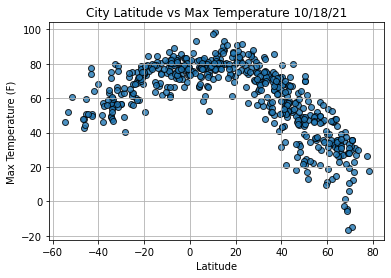

In [19]:
#import time module
import time

#build scatter plot for latitude vs max temp
plt.scatter(lats, max_temp, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

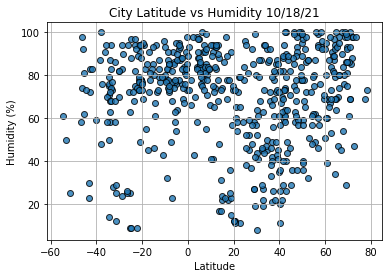

In [23]:
#build scatter plot for latitude vs humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig2.png")

#show plot
plt.show()

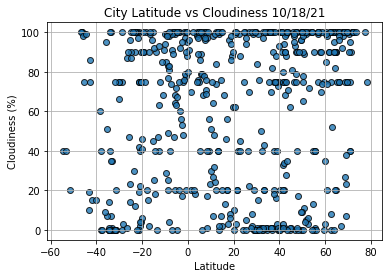

In [24]:
#build scatter plot for latitude vs cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig3.png")

#show plot
plt.show()

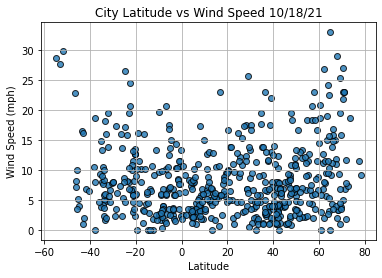

In [25]:
#build scatter plot for latitude vs wind speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig4.png")

#show plot
plt.show()